In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full , y_train_full) ,(x_test , y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


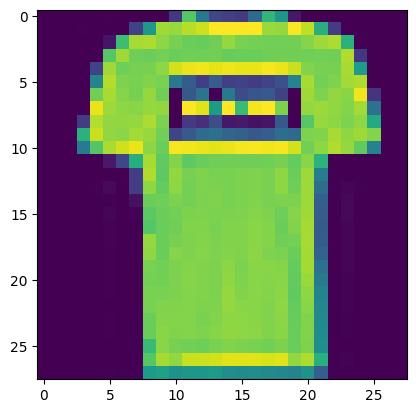

In [ ]:
plt.imshow(x_train_full[1])

In [ ]:
class_names =["T-shirts/top", "Trouser" , "Pullover", "Dress" , "Coat", "Sandal" , "Shirt" ,"Sneaker", "Bag" , "Ankle boot"]

In [ ]:
class_names[y_train_full[1]]

'T-shirts/top'

In [ ]:
# data is 28 by 28 pixel value where intensity lies rom 0 to 255
print(x_train_full[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

In [ ]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.  #normalizing means putting pixel denstities between 0 to 1

In [ ]:
x_valid , x_train = x_train_n[:5000] , x_train_n[5000:]
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
x_test = x_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28 , 28])) # to convert 28*28 into 784 1d
model.add(keras.layers.Dense(300 , activation = 'relu'))
model.add(keras.layers.Dense(100 , activation  = 'relu'))
model.add(keras.layers.Dense(10 , activation  = "softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


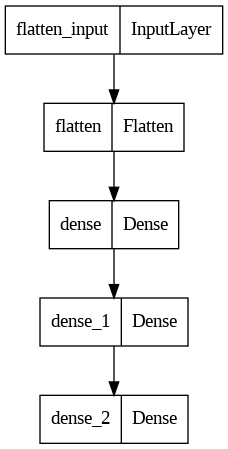

In [ ]:
#to look our nueral network
import matplotlib.pyplot as plt
keras.utils.plot_model(model)

In [ ]:
weights , baises = model.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
model.compile(loss= "sparse_categorical_crossentropy" , optimizer = "sgd" ,metrics = ["accuracy"])

In [ ]:
model.history = model.fit(x_train , y_train  , epochs = 30,
                          validation_data = (x_valid , y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 8ms/step - loss: 0.7284 - accuracy: 0.7604 - val_loss: 0.5285 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4927 - accuracy: 0.8271 - val_loss: 0.4450 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4466 - accuracy: 0.8435 - val_loss: 0.5515 - val_accuracy: 0.7948
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4197 - accuracy: 0.8525 - val_loss: 0.3981 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4009 - accuracy: 0.8596 - val_loss: 0.3833 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3820 - accuracy: 0.8652 - val_loss: 0.3755 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3692 - accuracy: 0.8701 - val_loss: 0.3697 - val_accur

In [ ]:
model.history.history


{'loss': [0.7284085750579834,
  0.4927161931991577,
  0.4465911090373993,
  0.4196649193763733,
  0.40093690156936646,
  0.3819628059864044,
  0.3691532015800476,
  0.35723182559013367,
  0.34634754061698914,
  0.336925745010376,
  0.32826972007751465,
  0.3187170922756195,
  0.31139349937438965,
  0.30510109663009644,
  0.29695311188697815,
  0.29181355237960815,
  0.28629177808761597,
  0.27970394492149353,
  0.27473607659339905,
  0.26916804909706116,
  0.2636837959289551,
  0.25860607624053955,
  0.2545359134674072,
  0.25021451711654663,
  0.2454236000776291,
  0.2411496937274933,
  0.2379552274942398,
  0.2340397834777832,
  0.2288893163204193,
  0.22552794218063354],
 'accuracy': [0.760418176651001,
  0.8270545601844788,
  0.8434908986091614,
  0.852509081363678,
  0.8596000075340271,
  0.8652363419532776,
  0.8701454401016235,
  0.8729090690612793,
  0.8770727515220642,
  0.8798545598983765,
  0.8825272917747498,
  0.8851454257965088,
  0.8893818259239197,
  0.8899454474449158,

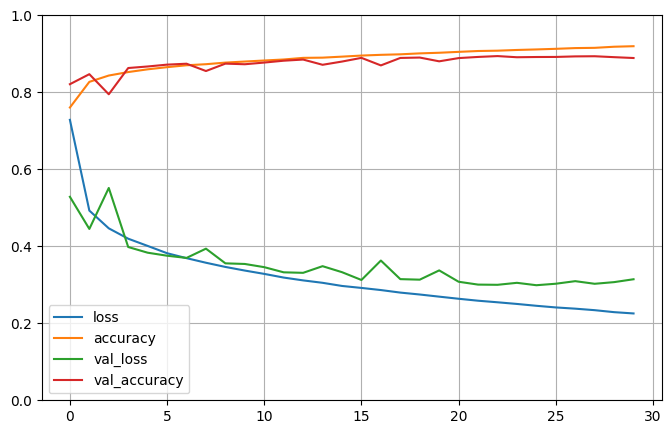

In [ ]:
pd.DataFrame(model.history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3458 - accuracy: 0.8805


[0.3458123803138733, 0.8805000185966492]

In [ ]:
x_new= x_test[:3]

In [ ]:
y_prob = model.predict(x_new)
y_prob.round(2)


1/1 [==============================] - 0s 432ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob , axis = 1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U12')

AxesImage(size=(28, 28))


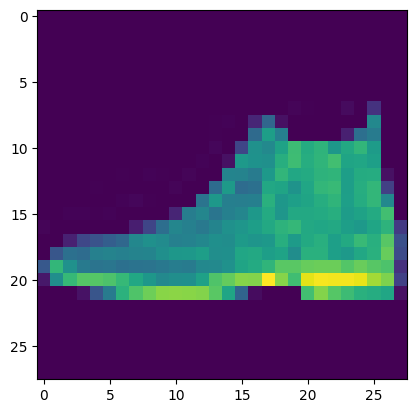

In [ ]:
print(plt.imshow(x_test[0]))

AxesImage(size=(28, 28))


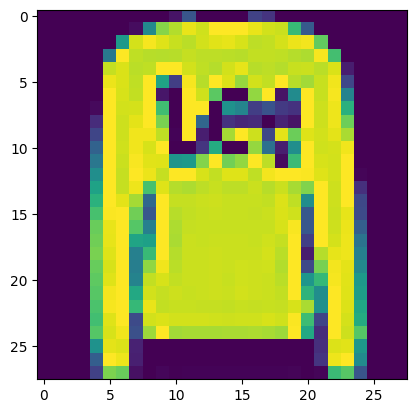

In [ ]:
print(plt.imshow(x_test[1]))

AxesImage(size=(28, 28))


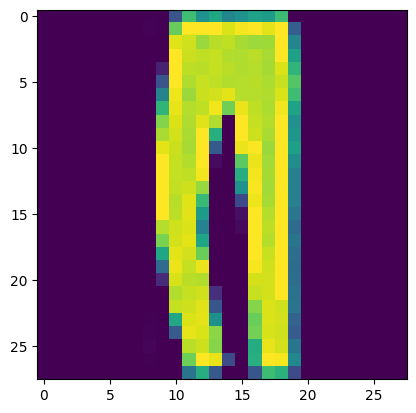

In [ ]:
print(plt.imshow(x_test[2]))